In [1]:
import os
import IPython.display as ipd
import matplotlib.pyplot as plt

import pandas as pd
import xml.etree.ElementTree as et 
import librosa

In [2]:
ipd.Audio('MIVIA_ROAD_DB1/MIVIA_ROAD_DB1/audio/A/v2/00001_1.wav')

In [3]:
data, sr = librosa.load('MIVIA_ROAD_DB1/MIVIA_ROAD_DB1/audio/A/v2/00001_1.wav')

Text(0.5, 1.0, 'Eventos sonoros')

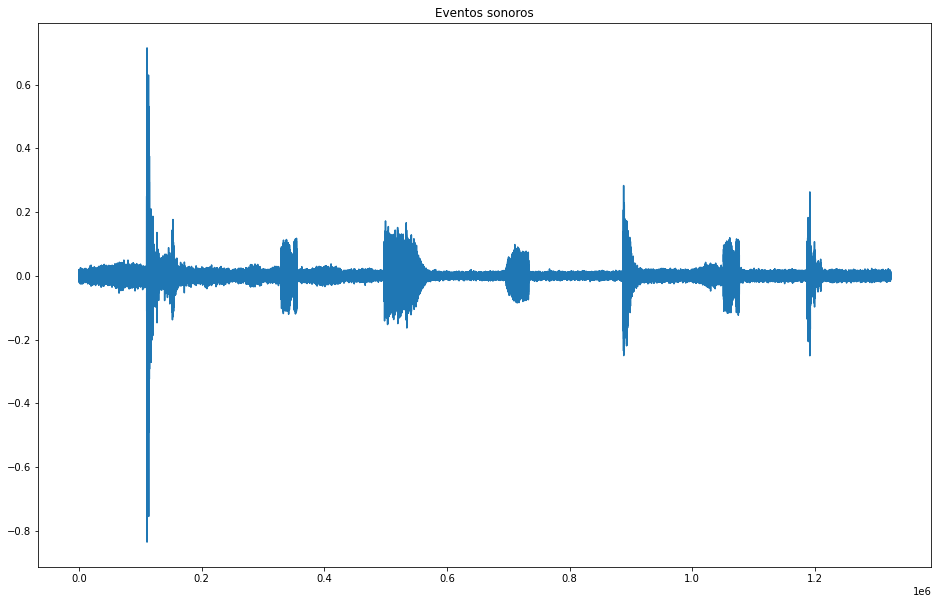

In [4]:
plt.figure(figsize=(16,10))
plt.plot(data)
plt.title('Eventos sonoros')

## Organização dos dados: 

| NOME | CLASSE | INICIO (s) | FIM (s) | GRUPO |
:------:|:-------:|:-------:|:----:|:------:|
|0046.wav |2      |5      |8.45565   |1     |
|0038.wav |3      |22      |25.56734   |2     |
.
.
.


```
Classes:
-------------------
1 => Background
2 => Car crashe
3 => Tire skidding
```

In [5]:
def get_elements_from_xml(xml_path, xml_name, group_name):
    xtree = et.parse(xml_path + '/' +xml_name)
    xroot = xtree.getroot()
     
    elements = []
    for el in xroot[0]:
        name = xml_name[0:-4]
        elements.append([
            name + '.wav',  # PATHNAME
            el[1].text,  # CLASS_ID
            el[3].text,  # STARTSECOND
            el[4].text,  # ENDSECOND
            group_name,   # GROUP
            f'DATASET/audio_files/{name}_1.wav' # PATH
        ])
    return elements

In [6]:
def get_audios_list(base_path, group_path):
    files = os.listdir(base_path + group_path)
    files = list(filter(lambda f: '.xml' in f, files))

    audios_list = []
    for xml_name in files:
        element_info = get_elements_from_xml(base_path + group_path, xml_name, group_path)
        audios_list += element_info
    return audios_list

In [7]:
audio_info = []
BASE_PATH = 'MIVIA_ROAD_DB1/MIVIA_ROAD_DB1/audio/'
GROUPS = ['A', 'B', 'C', 'D']

for g in GROUPS:
    audio_info += get_audios_list(BASE_PATH, g)

In [8]:
audio_info_df = pd.DataFrame(audio_info, columns=['NOME','CLASSE', 'INICIO', 'FIM', 'GRUPO', 'PATH'])
audio_info_df.to_csv('DATASET/audio_info.csv', index=False)
audio_info_df.head()

NOME CLASSE             INICIO                FIM GRUPO  \
0  00001.wav      3                  5  8.957732426303855     A   
1  00001.wav      2  14.95775510204082  16.12680272108844     A   
2  00001.wav      3   22.1268253968254  26.53537414965986     A   
3  00001.wav      2  31.53539682539683  33.25492063492064     A   
4  00001.wav      3   40.2549433106576  41.67090702947846     A   

                              PATH  
0  DATASET/audio_files/00001_1.wav  
1  DATASET/audio_files/00001_1.wav  
2  DATASET/audio_files/00001_1.wav  
3  DATASET/audio_files/00001_1.wav  
4  DATASET/audio_files/00001_1.wav